<h1 style="color:red">Clinical Trial Data Analysis 2021</h1>

## **Listing Data Directory**

In [1]:
!dir ..\data\*.csv

 Volume in drive C is Local Disk
 Volume Serial Number is 3240-AEBB

 Directory of C:\Users\Sachi\Downloads\Solution\data

08/27/2022  12:25 AM        42,400,056 clinicaltrial_2019.csv
08/27/2022  12:24 AM        50,359,696 clinicaltrial_2021.csv
08/27/2022  12:24 AM         5,295,548 mesh.csv
08/27/2022  12:24 AM           678,999 pharma.csv
               4 File(s)     98,734,299 bytes
               0 Dir(s)  193,321,541,632 bytes free


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)


DATA_DIR = "../data/"

clinical_data_2021_path = os.path.join(DATA_DIR, "clinicaltrial_2021.csv")
clinical_data_2019_path = os.path.join(DATA_DIR, "clinicaltrial_2019.csv")
mesh_data_path = os.path.join(DATA_DIR, "mesh.csv")
pharma_data_path = os.path.join(DATA_DIR, "pharma.csv")

clinic_2021 = pd.read_csv(clinical_data_2021_path, sep="|")
clinic_2020 = pd.read_csv(clinical_data_2019_path, sep="|")
mesh = pd.read_csv(mesh_data_path)
pharma = pd.read_csv(pharma_data_path)

### Let's Explore Data

    let's see top rows of each DataFrame

In [3]:
clinic_2021.head()

,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
0,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
1,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
2,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
3,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN
4,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",NaN


In [4]:
pharma.head()

,Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
0,Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million t...,federal,agency action,Justice Department Civil Division,civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laborato...,NaN
1,Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical p...,NaN,Global Health Care Company Abbott Laboratories...,federal,agency action,Food and Drug Administration referral to the J...,civil and criminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-...,NaN
2,Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,NaN,"Abbott Laboratories Inc., B. Braun Medical Inc...",federal,agency action,Justice Department Civil Division,civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-...,NaN
3,"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,NaN,federal,agency action,Labor Department Wage and Hour Division,civil,NaN,NaN,1527129,NaN,NaN,Puerto Rico,San Juan,NaN,NaN,423450.0,"423450: Medical, Dental, and Hospital Equipmen...",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by ...",Date and year are the Findings End Date in the...
4,Acclarent Inc.,Johnson & Johnson,"$18,000,000",$0,"$18,000,000",2016,20160722,government-contracting-related offenses,False Claims Act and related,NaN,California-based medical device manufacturer A...,federal,agency action,Justice Department Civil Division,civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,New Jersey,publicly traded,JNJ,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/johnson-johnson...,NaN


In [5]:
mesh.head()

,term,tree
0,Calcimycin,D03.633.100.221.173
1,A-23187,D03.633.100.221.173
2,Temefos,D02.705.400.625.800
3,Temefos,D02.705.539.345.800
4,Temefos,D02.886.300.692.800


In [6]:
## Null Values per column
clinic_2021.isna().sum()

Id                    0
Sponsor               0
Status                0
Start                 0
Completion        13260
Type                  0
Submission            0
Conditions        65131
Interventions    253837
dtype: int64

In [7]:
# Null Values in percentage 
round((clinic_2021.isna().sum() / clinic_2021.shape[0])*100, 2)

Id                0.00
Sponsor           0.00
Status            0.00
Start             0.00
Completion        3.42
Type              0.00
Submission        0.00
Conditions       16.82
Interventions    65.55
dtype: float64

### Outline 

    We will follow a typical data analysis process

    1. Load / ingest the data to be analysed
    2. Prepare / clean the data
    3. Analyse the data
    4. Visualise results / generate report

### Data Description 

    1. clinicaltrial <year>.csv: each row represents an individual clinical trial, identified by an Id,
        listing the sponsor (Sponsor), the status of the study at time of the file’s download (Status), the
        start and completion dates (Start and Completion respectively), the type of study (Type), when the
        trial was first submitted (Submission), and the lists of conditions the trial concerns (Conditions) and
        the interventions explored (Interventions). Individual conditions and interventions are separated by
        commas. (Source: ClinicalTrials.gov)

    
    2. mesh.csv: the conditions from the clinical trial list may also appear in a number of hierarchies. The
        hierarchy identifiers have the format [A-Z][0-9]+(˙
        [A-Z][0-9]+)* (such as, e.g., D03.633.100.221.173)
        where the initial letter and number combination designates the root of this particular hierarchy
        (in the example, this is D03) and each “.” descends a level down the hierarchy. The rows of this
        file contain condition (term), hierarchy identifier (tree) pairs. (Source: U.S. National Library of
        Medicine.)

    3. pharma.csv: the file contains a small number of a publicly available list of pharmaceutical violations.
        For the puposes of this work, we are interested in the second column, Parent Company, which contains the name of the pharmaceutical company in question. (Source: https://violationtracker.
    goodjobsfirst.org/industry/pharmaceuticals)

### Problem statements


    You are a data analyst / data scientist whose client wishes to gain further insight into clinical trials. You
    are tasked with answering these questions, using visualisations where these would support your conclusions.
    You should address the following problem statements. You should use the solutions for historical datasets
    (available on Blackboard) to test your implementation.
    
    
    1. The number of studies in the dataset. You must ensure that you explicitly check distinct studies.
    
    2. You should list all the types (as contained in the Type column) of studies in the dataset along with
        the frequencies of each type. These should be ordered from most frequent to least frequent.
    
    3. The top 5 conditions (from Conditions) with their frequencies.
    
    4. Each condition can be mapped to one or more hierarchy codes. The client wishes to know the 5
        most frequent roots (i.e. the sequence of letters and numbers before the first full stop) after this is done.
    
                To clarify, suppose your clinical trial data was:
                    
                    NCT01, ... ,"Disease_A,Disease_B",
                    NCT02, ... ,Disease_B,
                
                And the mesh file contained:
                
                    Disease_A A01.01 C23.02
                    Disease_B B01.34.56

                The result would be
                
                    B01 2
                    A01 1
                    C23 1
    5. Find the 10 most common sponsors that are not pharmaceutical companies, along with the number
        of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the
        Parent Company column contains all possible pharmaceutical companies.
    
    6. Plot number of completed studies each month in a given year – for the submission dataset, the year
        is 2021. You need to include your visualization as well as a table of all the values you have plotted
        for each month

In [8]:
nrows = clinic_2021.shape[0]
print(f"We have total {nrows} clinical trials.")

We have total 387261 clinical trials.


### 1. The number of studies in the dataset
    
   

In [9]:
clinic_2021['Id'].unique().shape[0]

387261

In [10]:
total_studies = clinic_2021['Id'].unique().shape[0]

print(f"We have total {total_studies} cases in Clinical Trial 2021 Datasets.")

We have total 387261 cases in Clinical Trial 2021 Datasets.


### 2. listing all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. 

    Ordered from most frequent to least frequent.

In [11]:
clinic_2021.groupby('Type')["Id"].count().sort_values(ascending=False)

Type
Interventional                      301472
Observational                        77540
Observational [Patient Registry]      8180
Expanded Access                         69
Name: Id, dtype: int64

In [12]:
type_of_study = clinic_2021.groupby('Type')["Id"].count().sort_values(ascending=False).reset_index()
type_of_study.columns = ["Type", "Count"]

In [13]:
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [14]:
type_of_study

,Type,Count
0,Interventional,301472
1,Observational,77540
2,Observational [Patient Registry],8180
3,Expanded Access,69


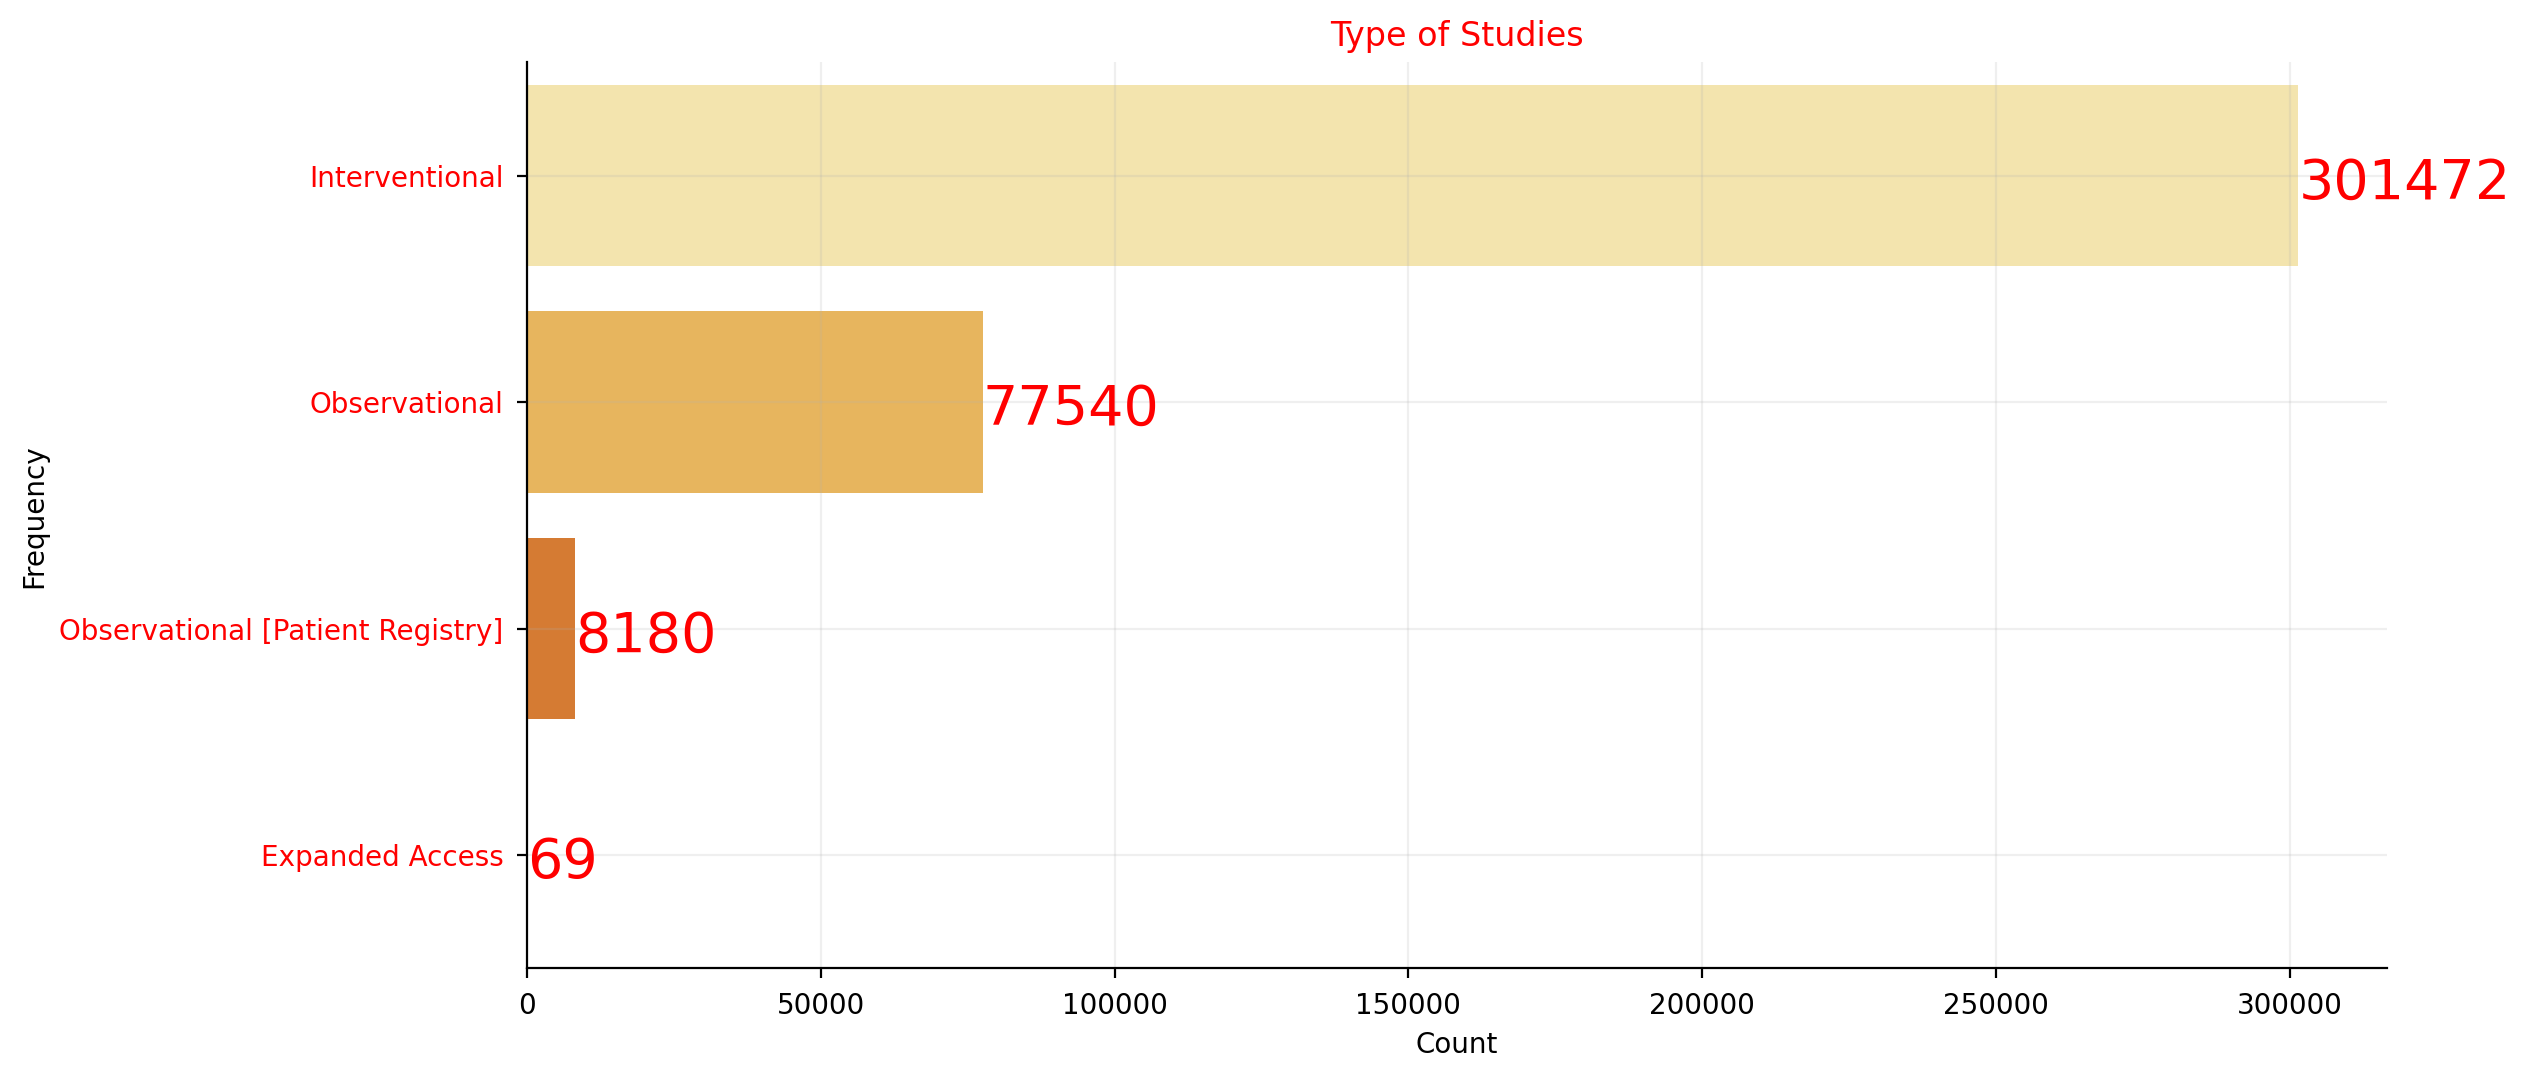

In [15]:
plt.figure(dpi=200)
sns.barplot(y=type_of_study['Type'], x=type_of_study['Count'],palette="YlOrBr", orient="h")
ax = plt.gca()
plt.grid(alpha=0.2)
for patch, lb in zip(ax.patches, ax.get_yticklabels()):
    x  = patch.get_y() + 0.5
    h = patch.get_width()
    y = h 
    text = int(h)
    
    ax.text(y, x, text, fontsize=20, color='red')
    lb.set_color("red")
plt.title("Type of Studies", color='red')
plt.ylabel("Frequency")
#plt.xticks(range(int(max(type_of_study['count'])+max(type_of_study['count'])*.2)), 2500)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

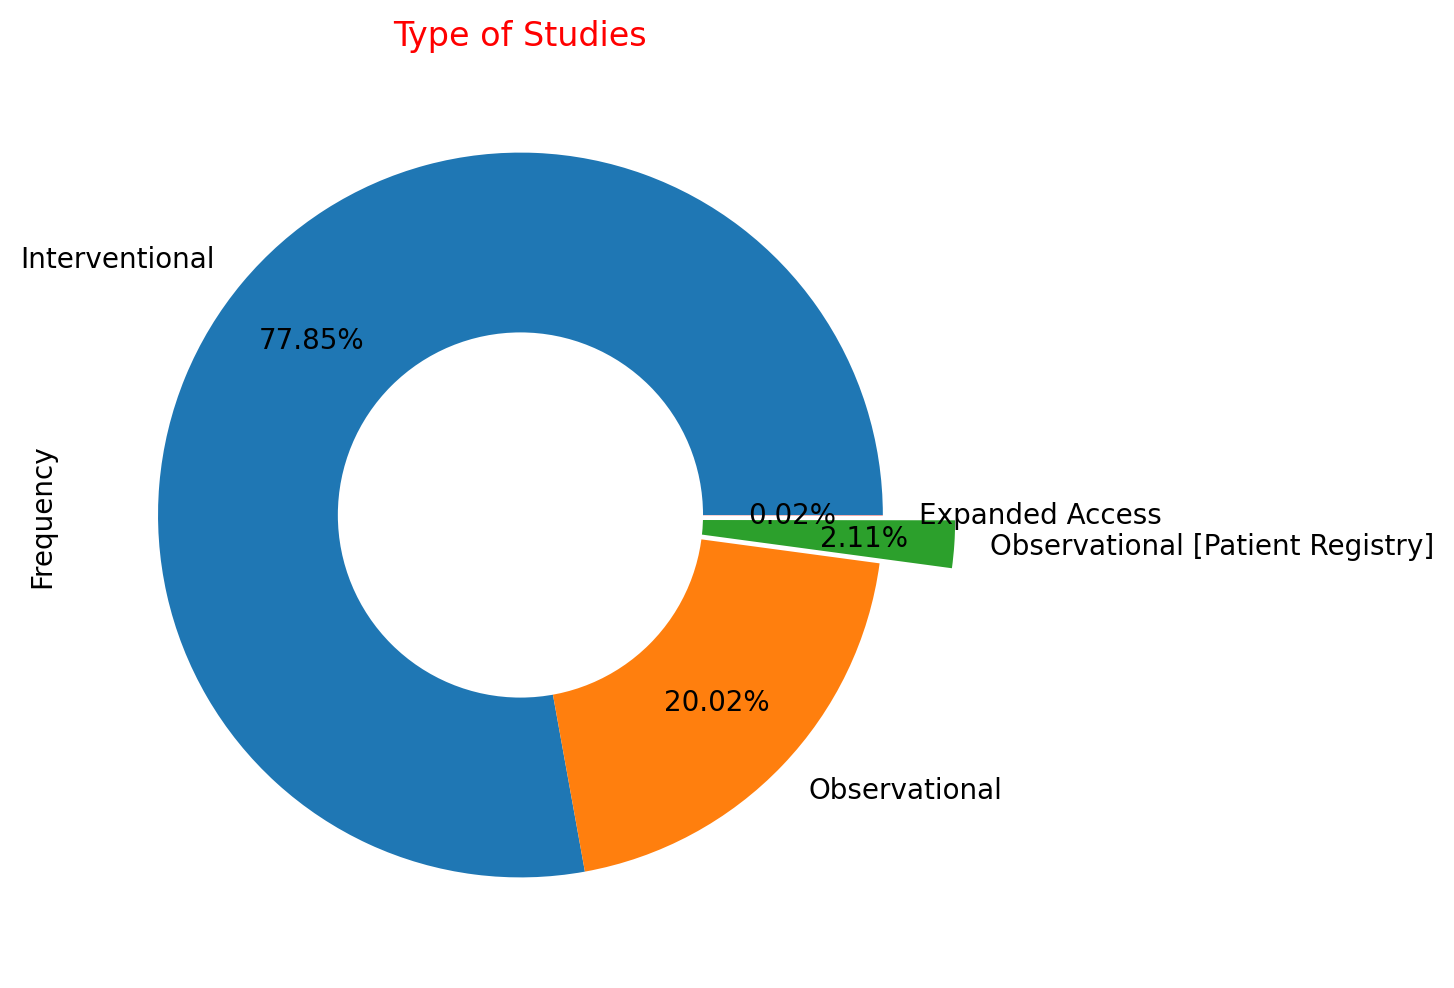

In [16]:
plt.figure(dpi=200)
plt.pie(type_of_study['Count'], labels=type_of_study['Type'], autopct="%.2f%%", pctdistance=0.75, explode=[0, 0, 0.2, 0])
ax = plt.gca()
plt.grid(alpha=0.2)
my_circle=plt.Circle( (0,0), 0.5, color='white')
ax.add_artist(my_circle)
plt.title("Type of Studies", color='red')
plt.ylabel("Frequency")
plt.show()

### 3. The top 5 conditions (from Conditions) with their frequencies.


    

In [17]:
# Preprocessing Data to Find All Conditions 

conditions = clinic_2021['Conditions'].str.split(',')

all_conditions = []

for cond in conditions.values:
    if cond is not np.nan:
        all_conditions.extend(cond)
        
conditions = pd.Series(all_conditions)


In [20]:
s = pd.Series(all_conditions)

In [21]:
top_conditions = conditions.value_counts().head(10).reset_index()
top_conditions.columns = ["Condition", "Frequency"]

In [22]:
s.value_counts().head(5)

Carcinoma            13389
Diabetes Mellitus    11080
Neoplasms             9371
Breast Neoplasms      8640
Syndrome              8032
dtype: int64

In [23]:
top_conditions

,Condition,Frequency
0,Carcinoma,13389
1,Diabetes Mellitus,11080
2,Neoplasms,9371
3,Breast Neoplasms,8640
4,Syndrome,8032
5,Leukemia,5904
6,Lung Neoplasms,5598
7,COVID-19,5567
8,Lymphoma,5395
9,Hypertension,5364


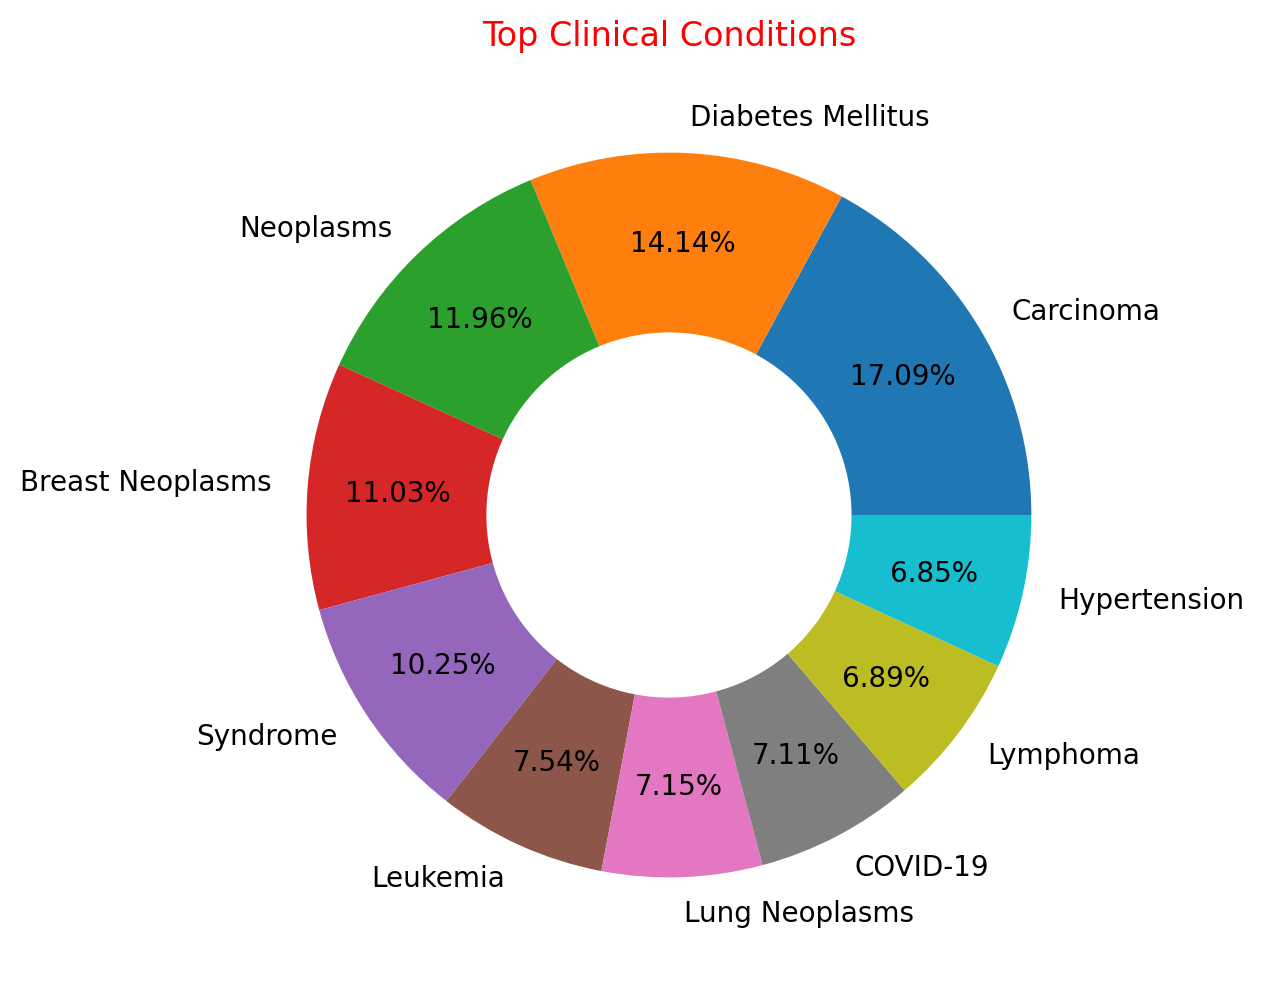

In [24]:
plt.figure(dpi=200)
plt.pie("Frequency", labels="Condition", 
        data=top_conditions, autopct="%.2f%%", 
        pctdistance=0.75)
ax = plt.gca()
plt.grid(alpha=0.2)
my_circle=plt.Circle( (0,0), 0.5, color='white')
ax.add_artist(my_circle)
plt.title("Top Clinical Conditions", color='red')
plt.show()

### 4. Each condition can be mapped to one or more hierarchy codes. The client wishes to know the 5
    
    
    most frequent roots (i.e. the sequence of letters and numbers before the first full stop) after this is done.

            To clarify, suppose your clinical trial data was:

                NCT01, ... ,"Disease_A,Disease_B",
                NCT02, ... ,Disease_B,

            And the mesh file contained:

                Disease_A A01.01 C23.02
                Disease_B B01.34.56

            The result would be

                B01 2
                A01 1
                C23 1

In [25]:
# Extracting Mesh Code From Mesh Tree
mesh["code"] = mesh["tree"].str.split(".", expand=True)[0]

In [26]:
mesh_codes = mesh[['term', 'code']]
mesh_codes.head()

,term,code
0,Calcimycin,D03
1,A-23187,D03
2,Temefos,D02
3,Temefos,D02
4,Temefos,D02


In [27]:
mesh_codes.set_index('term', inplace=True)
# seeting term as index value

In [28]:
mesh_codes.head()

,code
term,
Calcimycin,D03
A-23187,D03
Temefos,D02
Temefos,D02
Temefos,D02


In [29]:
trial_conditions = conditions.reset_index().drop('index', axis=1).copy()
trial_conditions.columns = ["condition"]

In [30]:
mesh_codes.reset_index(inplace=True)
mesh_codes.columns = ["condition", "code"]

In [31]:
codes = mesh_codes.merge(trial_conditions, on="condition")
codes = codes.groupby('code').count()
codes = codes.sort_values("condition", ascending=False).reset_index()
codes.columns = ["code", "count"]

In [32]:
codes.head(10)

,code,count
0,C04,143994
1,C23,136079
2,C01,106674
3,C14,94523
4,C10,92310
5,C06,85646
6,C08,70720
7,C13,42599
8,C18,41276
9,C12,40161


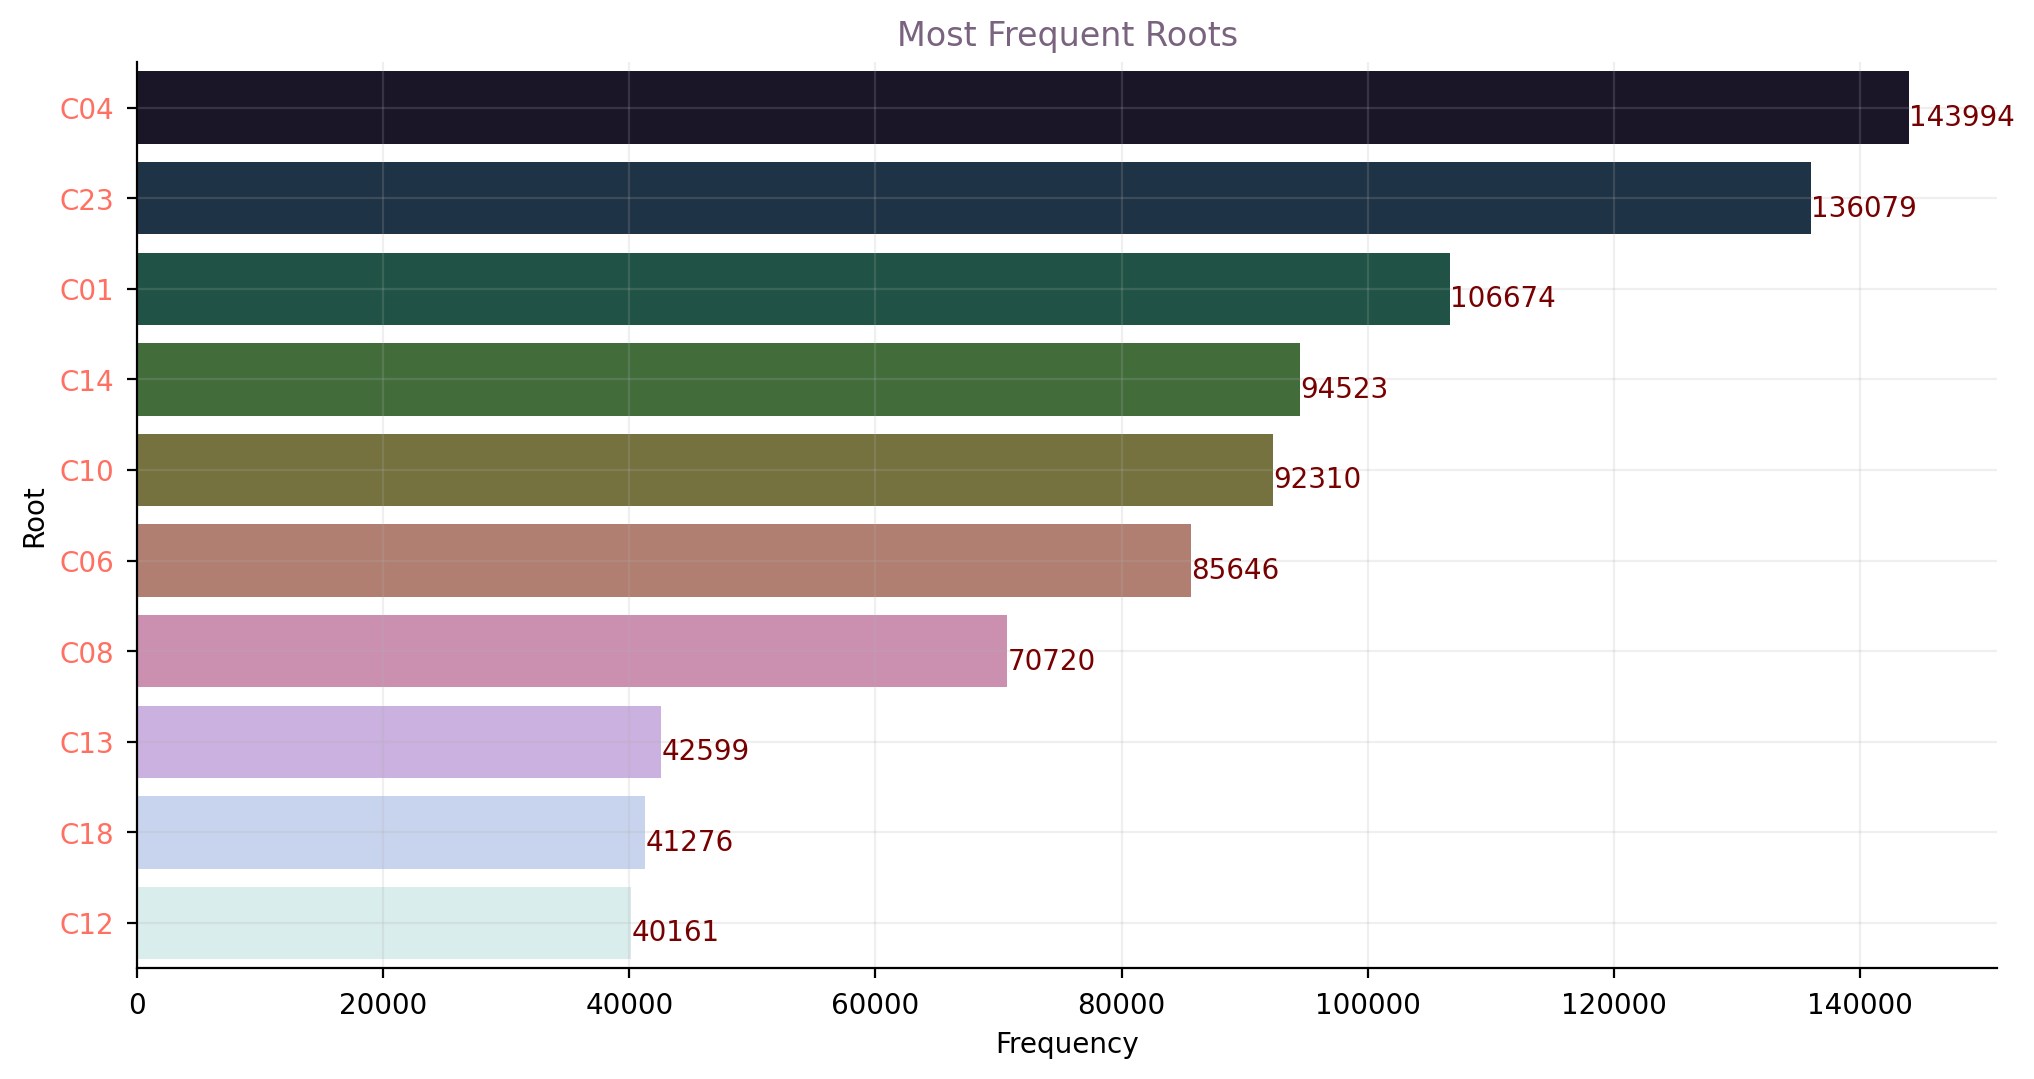

In [33]:
plt.figure(dpi=200)
sns.barplot(y="code", x="count",
            data=codes.head(10),
            palette="cubehelix",
            orient="h")
ax = plt.gca()
plt.grid(alpha=0.2)
for patch, lb in zip(ax.patches, ax.get_yticklabels()):
    x  = patch.get_y() + 0.6
    h = patch.get_width()
    y = h 
    text = int(h)
    ax.text(y, x, text, fontsize=10, color='#770000')
    lb.set_color("#ff7062")
plt.title("Most Frequent Roots", color='#7a637f')
plt.ylabel("Root")
plt.xlabel("Frequency")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

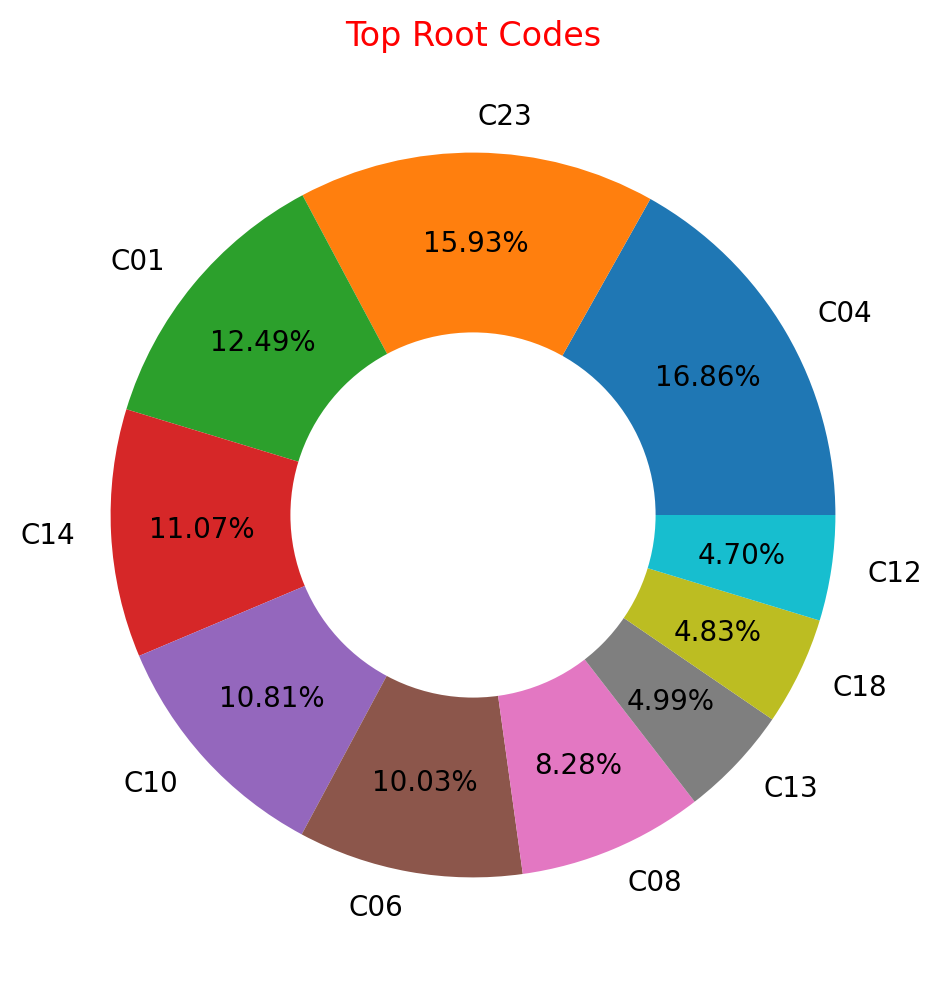

In [35]:
plt.figure(dpi=200)
plt.pie("count", labels="code", 
        data=codes.head(10), autopct="%.2f%%", 
        pctdistance=0.75)
ax = plt.gca()
plt.grid(alpha=0.2)
my_circle=plt.Circle( (0,0), 0.5, color='white')
ax.add_artist(my_circle)
plt.title("Top Root Codes", color='red')
plt.show()

### 5. 10 most common sponsors that are not pharmaceutical companies

    along with the number of clinical trials they have sponsored. 
    
    Hint: For a basic implementation, you can assume that the Parent Company column contains all possible pharmaceutical companies.

In [36]:
sponsors = clinic_2021[~clinic_2021['Sponsor'].isin(pharma['Parent_Company'])]['Sponsor'].value_counts().reset_index()
sponsors.columns = ["Sponsor", "count"]

In [37]:
sponsors.head(10)

,Sponsor,count
0,National Cancer Institute (NCI),3218
1,M.D. Anderson Cancer Center,2414
2,Assistance Publique - Hôpitaux de Paris,2369
3,Mayo Clinic,2300
4,Merck Sharp & Dohme Corp.,2243
5,Assiut University,2154
6,Novartis Pharmaceuticals,2088
7,Massachusetts General Hospital,1971
8,Cairo University,1928
9,Hoffmann-La Roche,1828


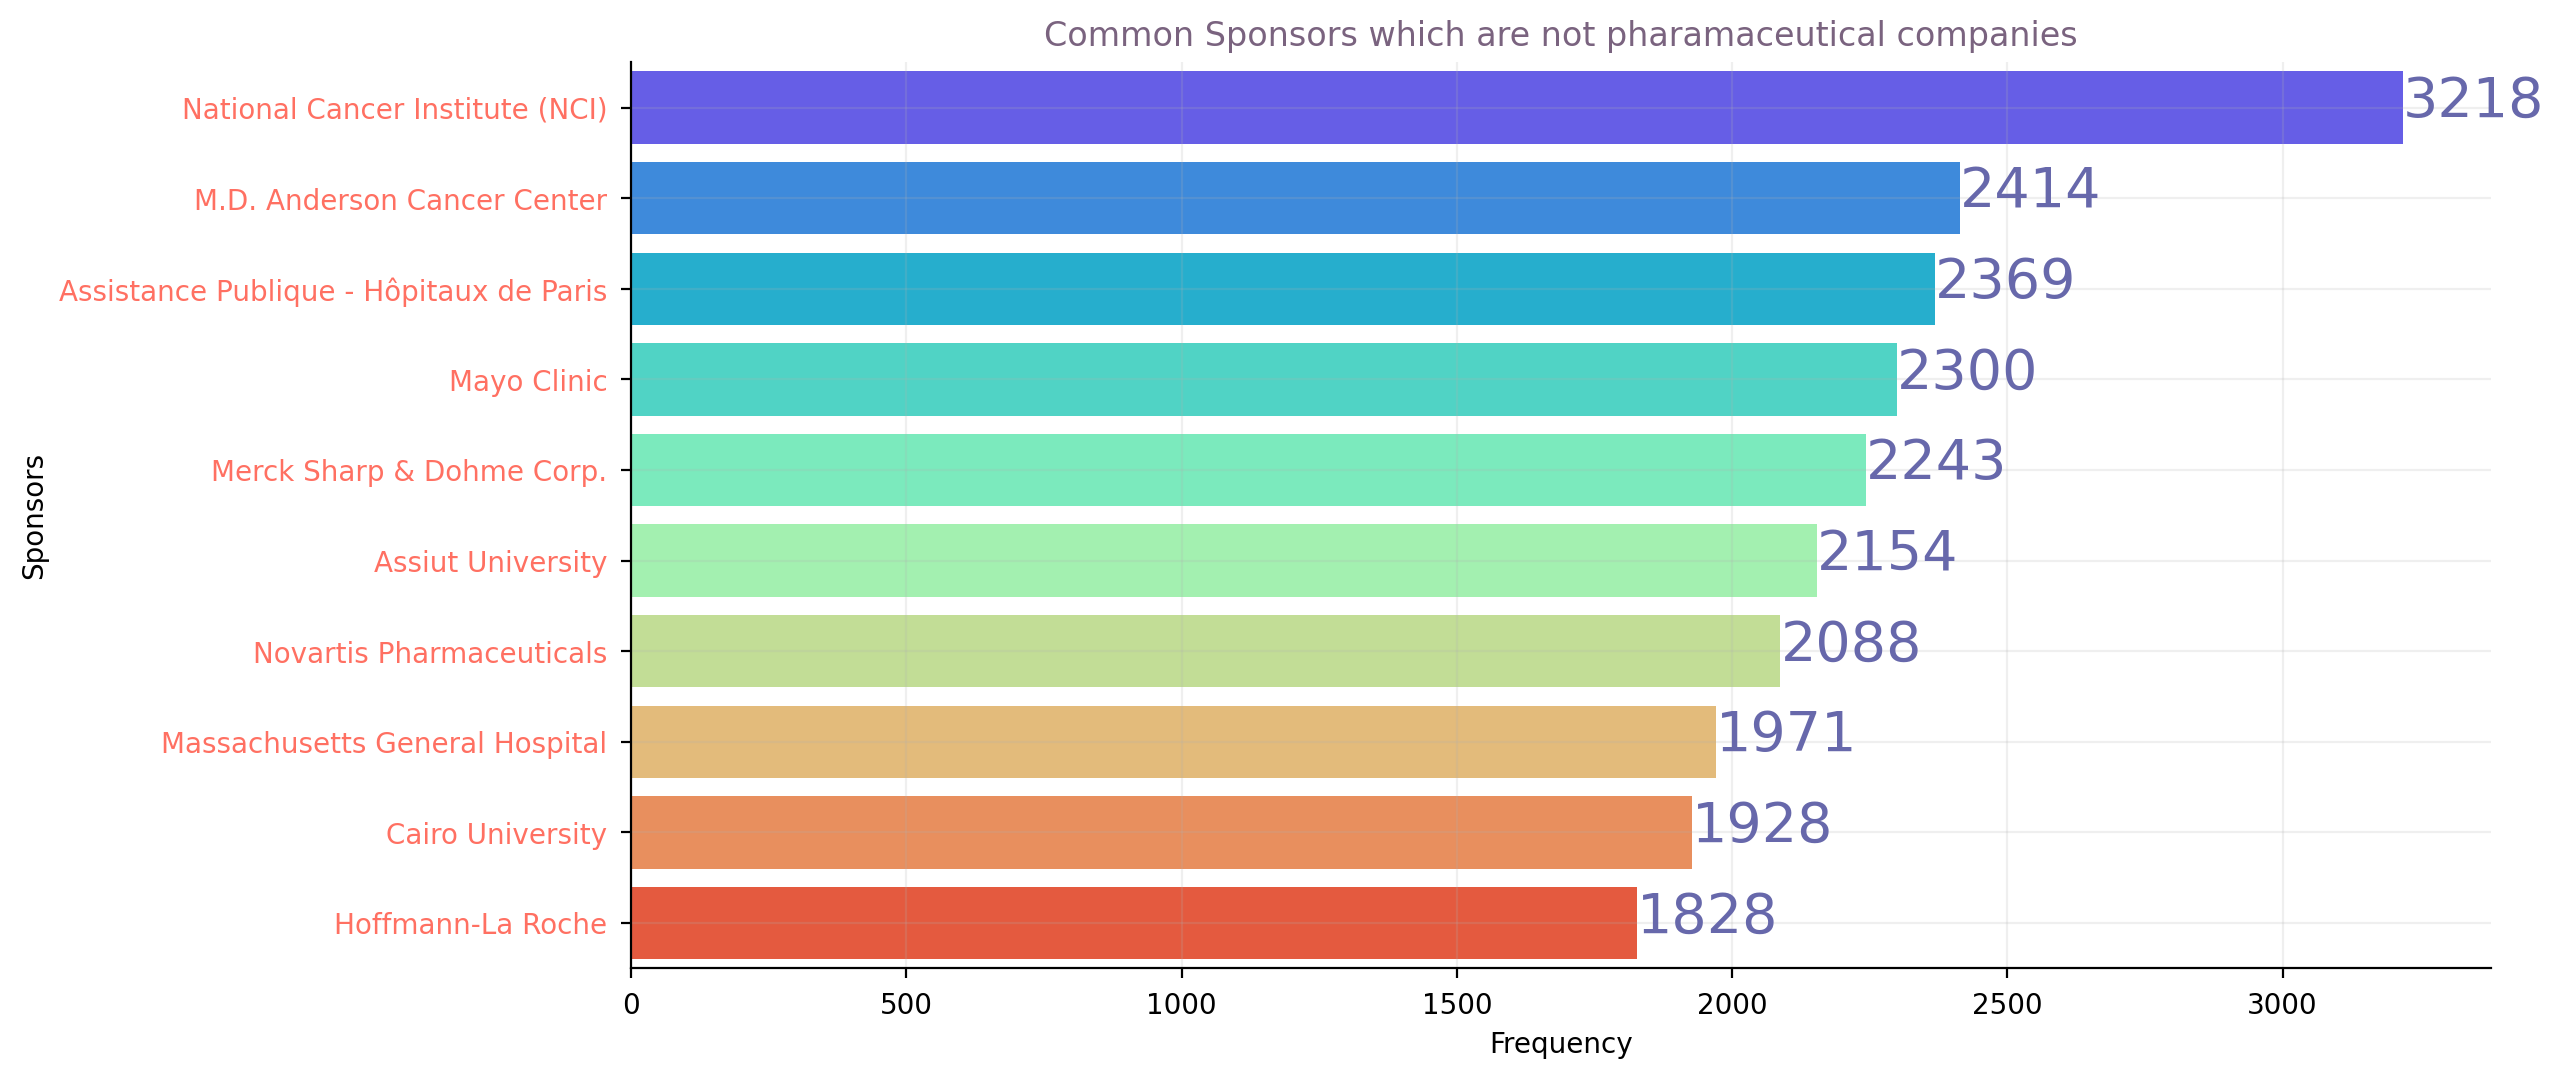

In [38]:
plt.figure(dpi=200)
sns.barplot(y='Sponsor', x='count',
            data=sponsors.head(10), palette="rainbow", 
            orient="h")
ax = plt.gca()
plt.grid(alpha=0.2)
for patch, lb in zip(ax.patches, ax.get_yticklabels()):
    x  = patch.get_y() + 0.5
    h = patch.get_width()
    y = h 
    text = int(h)
    
    ax.text(y, x, text, fontsize=20, color='#6768ab')
    lb.set_color("#ff7062")
plt.title("Common Sponsors which are not pharamaceutical companies", color='#7a637f')
plt.ylabel("Sponsors")
plt.xlabel("Frequency")
#plt.xticks(range(int(max(type_of_study['count'])+max(type_of_study['count'])*.2)), 2500)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

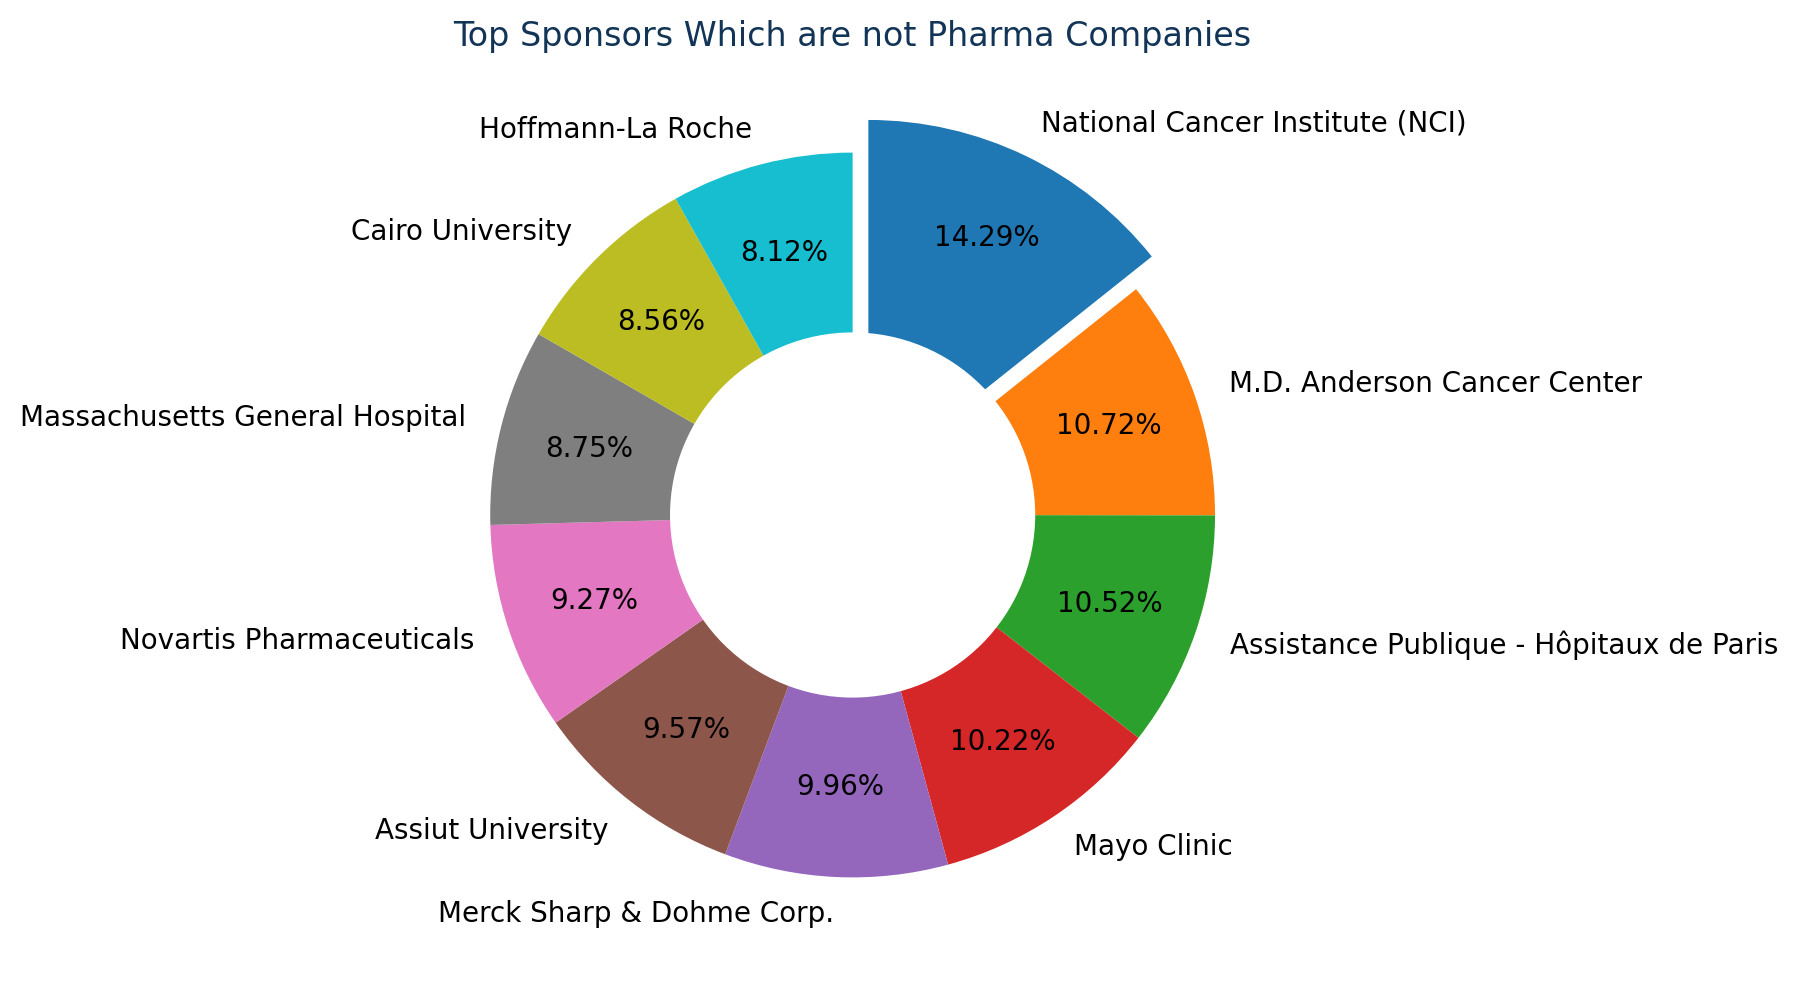

In [39]:
plt.figure(dpi=200)
plt.pie("count", labels="Sponsor", 
        data=sponsors.head(10), autopct="%.2f%%", 
        pctdistance=0.75, counterclock=False,
           startangle=90, explode=[0.1]+[0]*9)
ax = plt.gca()
plt.grid(alpha=0.2)
my_circle=plt.Circle( (0,0), 0.5, color='white')
ax.add_artist(my_circle)
plt.title("Top Sponsors Which are not Pharma Companies", color='#123456')
plt.show()

### 6. Ploting number of completed studies each month in a given year

    

In [40]:
data = clinic_2021['Completion'].str.split(" ", expand=True)
data.columns = ["Month", "Year"]


In [41]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]

In [42]:
completed_studies = data[(data['Year'] == '2021')&(clinic_2021['Status']=="Completed")]\
                        .groupby('Month')\
                        .count()\
                        .loc[months]\
                        .reset_index()
completed_studies.columns = ["Month", "count"]

In [43]:
completed_studies

,Month,count
0,Jan,1131
1,Feb,934
2,Mar,1227
3,Apr,967
4,May,984
5,Jun,1094
6,Jul,819
7,Aug,700
8,Sep,528
9,Oct,187


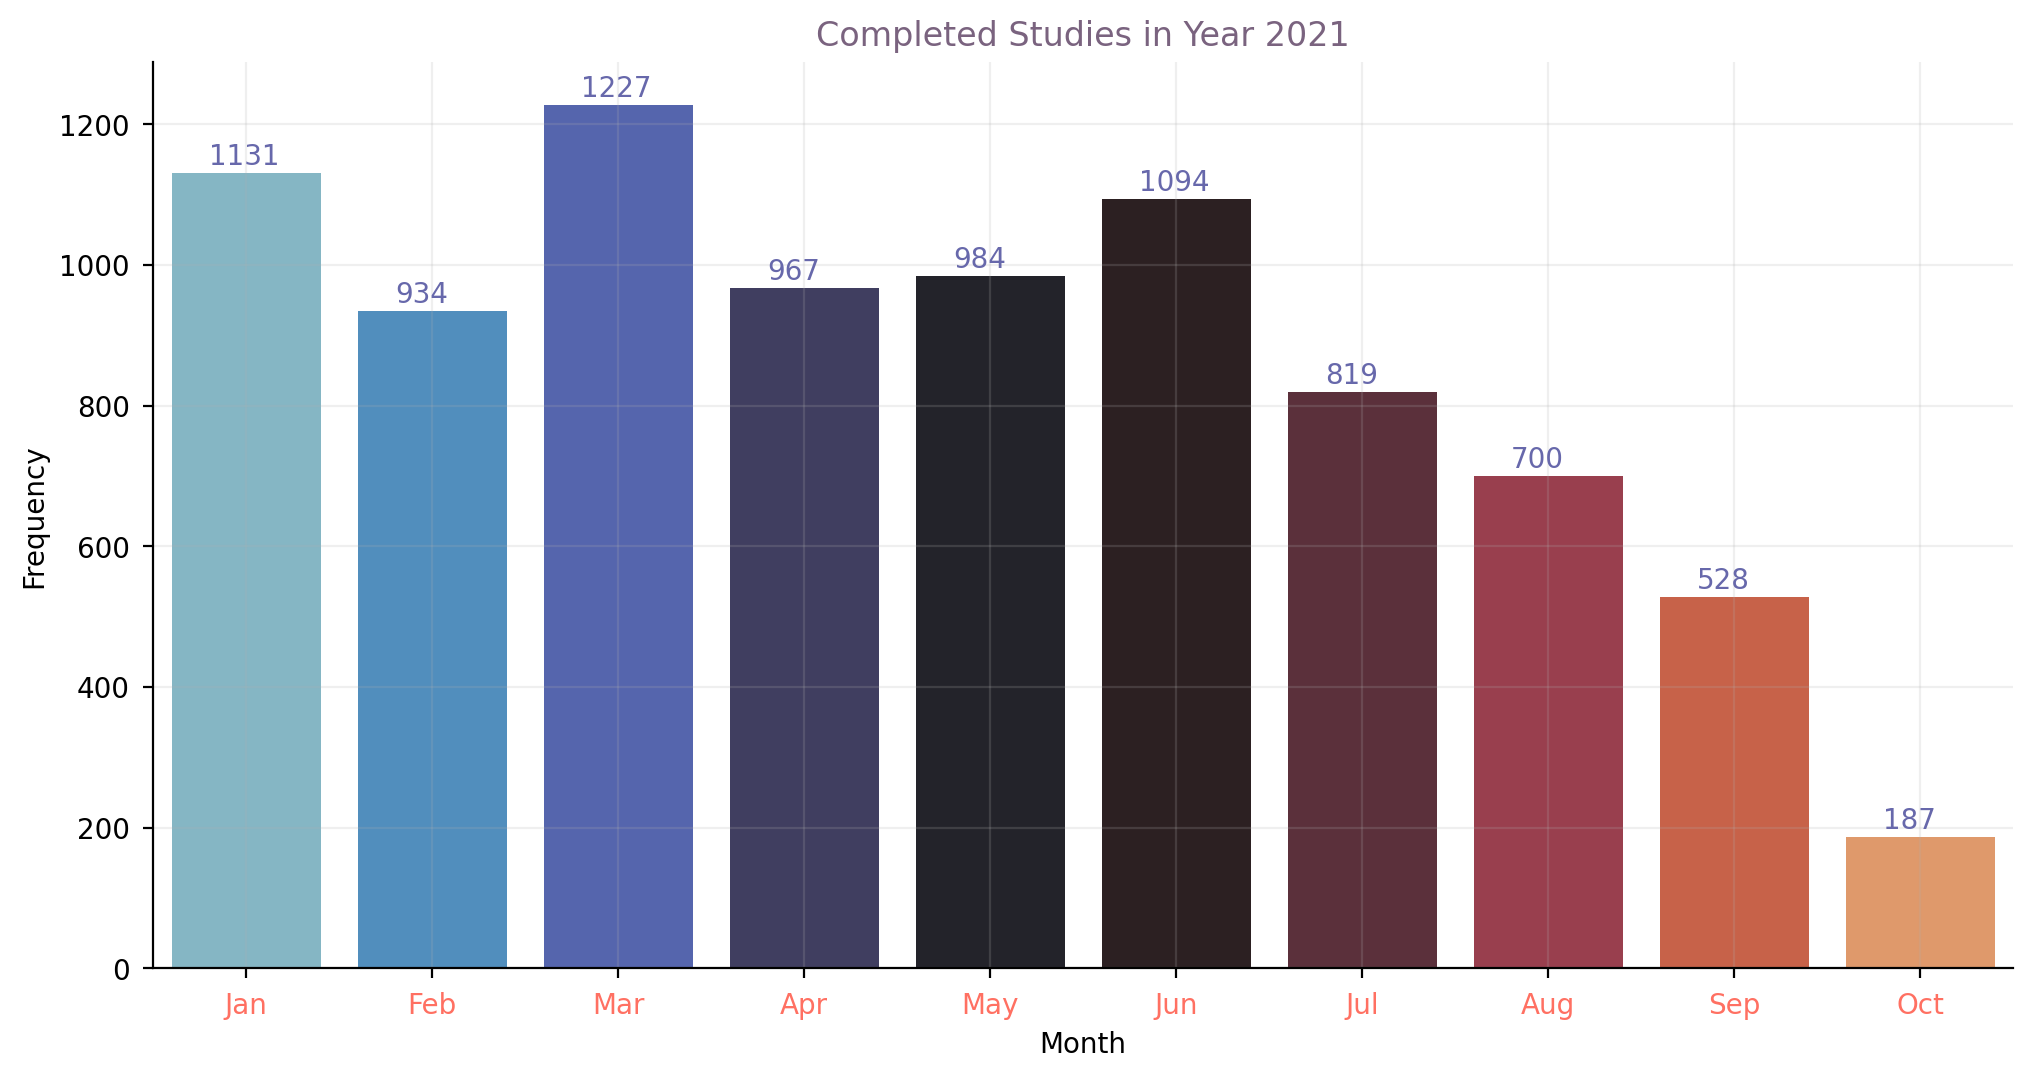

In [44]:
plt.figure(dpi=200)
sns.barplot(x='Month', y='count',
            data=completed_studies,
            palette="icefire")

ax = plt.gca()

for patch, lb in zip(ax.patches, ax.get_xticklabels()):
    x  = patch.get_x() + 0.2
    h = patch.get_height()
    y = patch.get_height() + max(completed_studies['count'])*0.01
    text = int(h)
    ax.text(x, y, text, fontsize=10, color='#6768ab')
    lb.set_color("#ff7062")
plt.title(f"Completed Studies in Year {2021}", color='#7a637f')
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

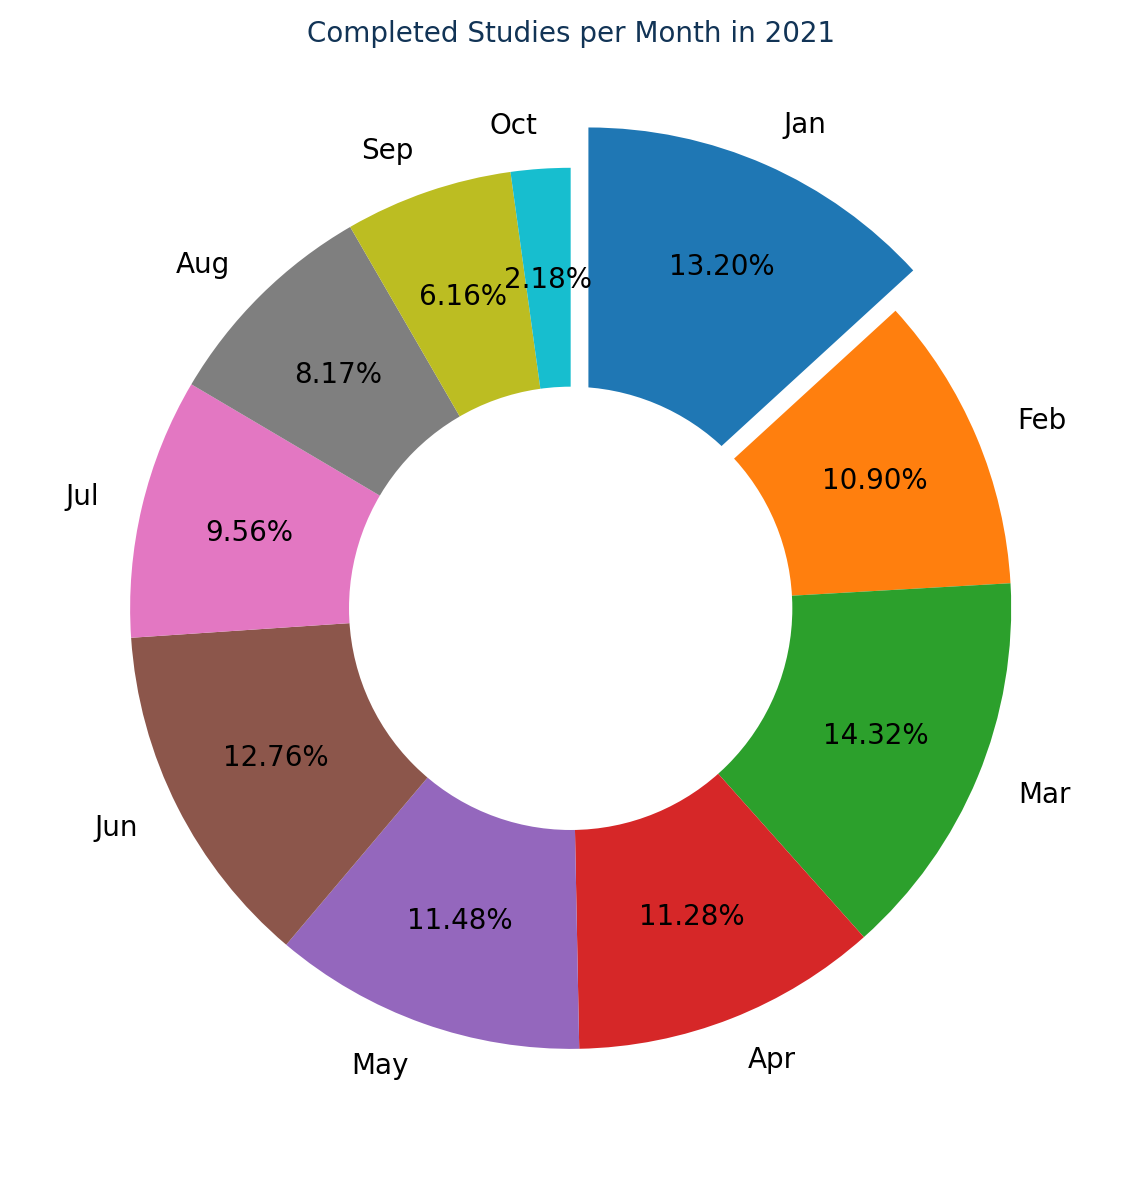

In [45]:
plt.figure(dpi=200)
plt.pie("count", labels="Month", 
        data=completed_studies, autopct="%.2f%%", 
        pctdistance=0.75, counterclock=False,
           startangle=90, explode=[0.1]+[0]*9)
ax = plt.gca()
plt.grid(alpha=0.2)
my_circle=plt.Circle( (0,0), 0.5, color='white')
ax.add_artist(my_circle)
plt.title("Completed Studies per Month in 2021", color='#123456', fontsize=10)
plt.tight_layout()
plt.show()

### That's all